In [184]:
%matplotlib inline  
import collections
import csv
import glob
import itertools
import matplotlib.pyplot as plt
import numpy as np
import optparse

In [185]:
parser = optparse.OptionParser()
parser.add_option("--system", dest="system");
parser.add_option("--strategy", dest="strategy");

In [186]:
Benchmark = collections.namedtuple('Benchmark', ['name', 'size', 'time'])

In [193]:
benchmarks = collections.defaultdict(lambda: [])
for log in glob.glob('benchmarks/*.log'):
    with open(log, 'r') as logfile:
        reader = csv.reader(logfile)
        for benchmark in reader:
            opts = parser.parse_args(benchmark[0].split())[0]
            name = "{} ({})".format(opts.strategy, opts.system)
            size = int(benchmark[1])
            time = float(benchmark[2])
            benchmarks[name].append(Benchmark(name, size, time))

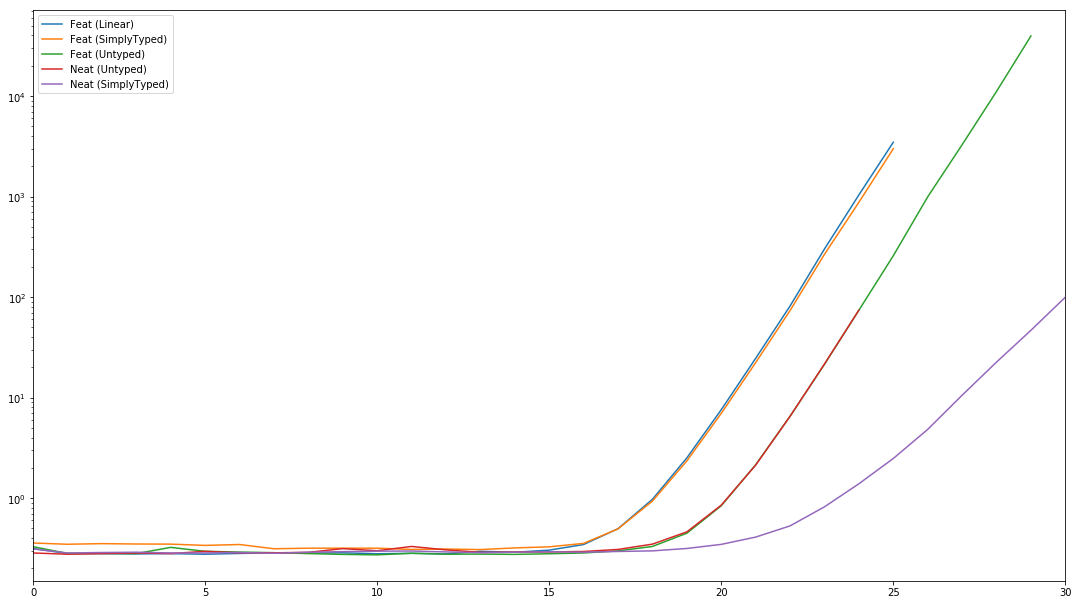

In [194]:
for label, data in benchmarks.items():
    data.sort(key=lambda b: b.size)
    data = [benchmark.time for benchmark in data]
    plt.plot(data, label=label)
plt.xlim(0,30)
plt.gcf().set_size_inches(18.5, 10.5)
plt.gca().set_yscale('log')
plt.legend(loc='upper left')
plt.show()